# Importar bibliotecas

In [1]:
import pandas as pd

# Leitura dos dados

In [2]:
df=pd.read_csv('credit_record.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


# Avaliação da base de dados

Vamos explorar a base de dados e buscar dados relevantes para trabalharmos com esses dados futuramente

# Variáveis

In [3]:
df.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')

# Tipos de dados de cada variável

In [4]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

# Quantidade de missings

In [5]:
df.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

# Distribuição da variável resposta mau

In [6]:
df['mau'].value_counts()

False    16260
True       390
Name: mau, dtype: int64

# Construir metadados

In [7]:
# Transformar a coluna em dataframe
df_metadados = pd.DataFrame(df.columns)
df_metadados.head()

,0
0,sexo
1,posse_de_veiculo
2,posse_de_imovel
3,qtd_filhos
4,tipo_renda


In [8]:
# Alterar nome da coluna
df_metadados.rename(columns={0:'variaveis'}, inplace=True)
df_metadados.head()

,variaveis
0,sexo
1,posse_de_veiculo
2,posse_de_imovel
3,qtd_filhos
4,tipo_renda


In [9]:
# Criar coluna para receber tipo dos dados das variáveis
df_metadados['tipo_dados'] = 0
df_metadados.head()

,variaveis,tipo_dados
0,sexo,0
1,posse_de_veiculo,0
2,posse_de_imovel,0
3,qtd_filhos,0
4,tipo_renda,0


In [10]:
# Agregar dados em uma lista
tp_dados=[]
for value in df.dtypes:
    tp_dados.append(value)
    
# Agregar lista no dataframe
df_metadados['tipo_dados'] = pd.DataFrame(tp_dados)
df_metadados.head()

,variaveis,tipo_dados
0,sexo,object
1,posse_de_veiculo,object
2,posse_de_imovel,object
3,qtd_filhos,int64
4,tipo_renda,object


In [12]:
# Criar uma lista para receber os valores
categorias=[]

# Contabilizar categorias das variaveis
for value in df:
    categorias.append(df[value].nunique())

# Criar nova coluna do dataframe para receber os valores
df_metadados['qtd_categorias'] = pd.DataFrame(categorias)
df_metadados.head()
    

,variaveis,tipo_dados,qtd_categorias
0,sexo,object,2
1,posse_de_veiculo,object,2
2,posse_de_imovel,object,2
3,qtd_filhos,int64,8
4,tipo_renda,object,5


# Criar variáveis dummy

In [16]:
#Visualizar os dados
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [21]:
# Transformar dados em dumy
df_dummies = pd.get_dummies(df)
df_dummies.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_F,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,1,...,0,0,1,0,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,1,...,0,0,1,0,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,1,...,1,0,0,0,0,1,0,0,0,0


# Eliminar variáveis do tipo str

In [22]:
# Exibir colunas ocultas
pd.set_option('max_columns', None)
df_dummies.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_Y,posse_de_imovel_N,posse_de_imovel_Y,tipo_renda_Commercial associate,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,tipo_renda_Working,educacao_Academic degree,educacao_Higher education,educacao_Incomplete higher,educacao_Lower secondary,educacao_Secondary / secondary special,estado_civil_Civil marriage,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0


# Qual variável é mais poderosa

In [27]:
# Exibir tabelas de interesse
df[['possui_email', 'posse_de_veiculo']].head()

,possui_email,posse_de_veiculo
0,0,Y
1,1,N
2,1,N
3,1,Y
4,0,Y


<AxesSubplot:xlabel='posse_de_veiculo'>

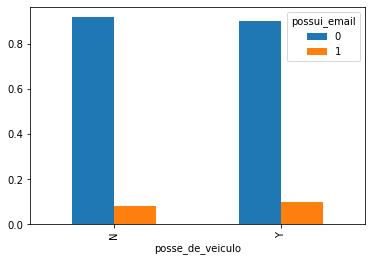

In [36]:
# Criar tabela cruzada com os dados
freq = pd.crosstab(df['posse_de_veiculo'], df['possui_email'])
freq_pct_lin = freq.div(freq.sum(axis=1), axis=0)
freq_pct_lin.plot.bar()

Por se tratar de variáveis para mensuração de status de maus pagadores a variável de posse_de_veiculo pode ser uma variável explicativa do motivo de não pagamento ou até mesmo um histórico e boa parte da base não possui e-mail sendo assim não podemos trabalhar bem com estes dados

# Salvar dataframe

In [37]:
df_dummies.to_csv('decision_tree_base')